## Preparations

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [48]:
train_df = pd.read_csv("../new_data/train_sessions.csv")
test_df = pd.read_csv("../new_data/test_sessions.csv")

train_df = train_df.fillna(0)
test_df = test_df.fillna(0)

train_df.head()

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
0,1,718,2014-02-20 10:02:45,0.0,0,0.0,0,0.0,0,0.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0
1,2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,...,2014-02-22 11:19:51,3847.0,2014-02-22 11:19:52,3846.0,2014-02-22 11:19:52,1516.0,2014-02-22 11:20:15,1518.0,2014-02-22 11:20:16,0
2,3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,...,2013-12-16 16:40:19,14768.0,2013-12-16 16:40:20,14768.0,2013-12-16 16:40:21,14768.0,2013-12-16 16:40:22,14768.0,2013-12-16 16:40:24,0
3,4,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,...,2014-03-28 10:54:42,782.0,2014-03-28 10:55:12,782.0,2014-03-28 10:55:42,782.0,2014-03-28 10:56:12,782.0,2014-03-28 10:56:42,0
4,5,22,2014-02-28 10:53:05,177.0,2014-02-28 10:55:22,175.0,2014-02-28 10:55:22,178.0,2014-02-28 10:55:23,177.0,...,2014-02-28 10:55:59,175.0,2014-02-28 10:55:59,177.0,2014-02-28 10:55:59,177.0,2014-02-28 10:57:06,178.0,2014-02-28 10:57:11,0


## Trying to include time data

*Copied two cells below*

In [49]:
times = ['time%s' % i for i in range(1, 11)]

train_df[times] = train_df[times].apply(pd.to_datetime)
test_df[times] = test_df[times].apply(pd.to_datetime, errors='coerce')
test_df.head()

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,...,site6,time6,site7,time7,site8,time8,site9,time9,site10,time10
0,1,29,2014-10-04 11:19:53,35.0,2014-10-04 11:19:53,22.0,2014-10-04 11:19:54,321.0,2014-10-04 11:19:54,23.0,...,2211.0,2014-10-04 11:19:54,6730.0,2014-10-04 11:19:54,21.0,2014-10-04 11:19:54,44582.0,2014-10-04 11:20:00,15336.0,2014-10-04 11:20:00
1,2,782,2014-07-03 11:00:28,782.0,2014-07-03 11:00:53,782.0,2014-07-03 11:00:58,782.0,2014-07-03 11:01:06,782.0,...,782.0,2014-07-03 11:01:10,782.0,2014-07-03 11:01:23,782.0,2014-07-03 11:01:29,782.0,2014-07-03 11:01:30,782.0,2014-07-03 11:01:53
2,3,55,2014-12-05 15:55:12,55.0,2014-12-05 15:55:13,55.0,2014-12-05 15:55:14,55.0,2014-12-05 15:56:15,55.0,...,55.0,2014-12-05 15:56:17,55.0,2014-12-05 15:56:18,55.0,2014-12-05 15:56:19,1445.0,2014-12-05 15:56:33,1445.0,2014-12-05 15:56:36
3,4,1023,2014-11-04 10:03:19,1022.0,2014-11-04 10:03:19,50.0,2014-11-04 10:03:20,222.0,2014-11-04 10:03:21,202.0,...,3374.0,2014-11-04 10:03:22,50.0,2014-11-04 10:03:22,48.0,2014-11-04 10:03:22,48.0,2014-11-04 10:03:23,3374.0,2014-11-04 10:03:23
4,5,301,2014-05-16 15:05:31,301.0,2014-05-16 15:05:32,301.0,2014-05-16 15:05:33,66.0,2014-05-16 15:05:39,67.0,...,69.0,2014-05-16 15:05:40,70.0,2014-05-16 15:05:40,68.0,2014-05-16 15:05:40,71.0,2014-05-16 15:05:40,167.0,2014-05-16 15:05:44


In [50]:
time_df = pd.DataFrame(index=train_df.index)
time_test_df = pd.DataFrame(index=train_df.index)


time_df['min'] = train_df[times].min(axis=1) 
time_df['max'] = train_df[times].max(axis=1)
time_df['minutes'] = round(((time_df['max'] - time_df['min']) / np.timedelta64(1, 's'))/60,2)

# time_test_df['min'] = test_df[times].min(axis=1) 
# time_test_df['max'] = test_df[times].max(axis=1)
# time_test_df['minutes'] = round(((time_test_df['max'] - time_test_df['min']) / np.timedelta64(1, 's'))/60,2)


time_df['start_month'] = time_df['min'].apply(lambda ts: 100 * ts.year + ts.month)
time_df['year'] = time_df['min'].apply(lambda ts: ts.year)
time_df['month'] = time_df['min'].apply(lambda ts: ts.month)

# time_test_df['start_month'] = time_test_df['min'].apply(lambda ts: 100 * ts.year + ts.month)
# time_test_df['year'] = time_test_df['min'].apply(lambda ts: ts.year)
# time_test_df['month'] = time_test_df['min'].apply(lambda ts: ts.month)


time_df['start_week'] = time_df['min'].apply(lambda ts: 100 * ts.year + ts.week)
time_df['start_day'] = time_df['min'].apply(lambda ts: ts.timetuple().tm_yday)
time_df['start_hour'] = time_df['min'].apply(lambda ts: ts.hour)

# time_test_df['start_week'] = time_test_df['min'].apply(lambda ts: 100 * ts.year + ts.week)
# time_test_df['start_day'] = time_test_df['min'].apply(lambda ts: ts.timetuple().tm_yday)
# time_test_df['start_hour'] = time_test_df['min'].apply(lambda ts: ts.hour)

time_df['dow'] = time_df['min'].apply(lambda ts: ts.date().weekday())
time_df['is_weekend'] = time_df['min'].apply(lambda ts: 1 if ts.date().weekday() in (5, 6) else 0)
time_df['work_hours'] = time_df['min'].apply(lambda ts: 1 if (ts.date().weekday() in (0,1,2,3)) &
                                             ((ts.hour>=8)&(ts.hour<=17)&(ts.hour!=12)) else 0)

# time_test_df['dow'] = time_test_df['min'].apply(lambda ts: ts.date().weekday())
# time_test_df['is_weekend'] = time_test_df['min'].apply(lambda ts: 1 if ts.date().weekday() in (5, 6) else 0)
# time_test_df['work_hours'] = time_test_df['min'].apply(lambda ts: 1 if (ts.date().weekday() in (0,1,2,3)) &
#                                              ((ts.hour>=8)&(ts.hour<=17)&(ts.hour!=12)) else 0)

time_df['target'] = train_df['target']
# time_test_df['target'] = test_df['target']
time_df.head()

,min,max,minutes,start_month,year,month,start_week,start_day,start_hour,dow,is_weekend,work_hours,target
0,1970-01-01 00:00:00,2014-02-20 10:02:45,23214842.75,197001,1970,1,197001,1,0,3,0,0,0
1,2014-02-22 11:19:50,2014-02-22 11:20:16,0.43,201402,2014,2,201408,53,11,5,1,0,0
2,2013-12-16 16:40:17,2013-12-16 16:40:24,0.12,201312,2013,12,201351,350,16,0,0,1,0
3,2014-03-28 10:52:12,2014-03-28 10:56:42,4.50,201403,2014,3,201413,87,10,4,0,0,0
4,2014-02-28 10:53:05,2014-02-28 10:57:11,4.10,201402,2014,2,201409,59,10,4,0,0,0


In [51]:
filtered = time_df[time_df["minutes"] < 1440] # let's consider that session can't be longer that 24 hours
mean_minutes = filtered["minutes"].mean()
time_df["minutes"] = time_df["minutes"].apply(lambda x: mean_minutes if x > 1440 else x)

<BarContainer object of 2 artists>

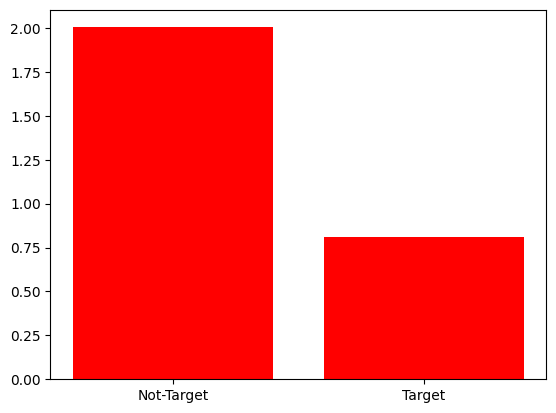

In [52]:
av_min_target = time_df[time_df["target"] == 1]["minutes"].mean()
av_min_notarget = time_df[time_df["target"] == 0]["minutes"].mean()

categories = ["Not-Target", "Target"]
values = [av_min_notarget, av_min_target]

plt.bar(categories, values, color="red")

target spends 2 times less

Text(0.5, 1.0, 'Not-Target')

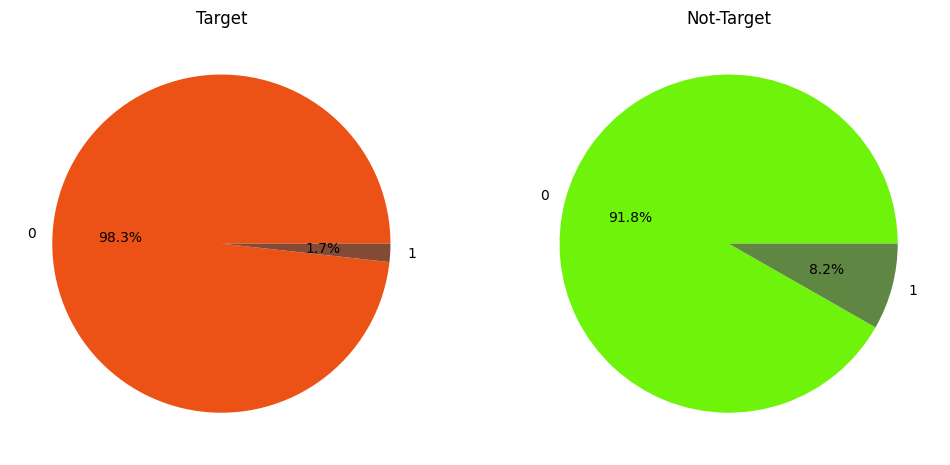

In [53]:
value_counts = time_df[time_df["target"] == 1]["is_weekend"].value_counts()
value_counts_al = time_df[time_df["target"] == 0]["is_weekend"].value_counts()

value_counts_df = value_counts.reset_index()
value_counts_df.columns =['is_weekend', 'count']

value_counts_tr_df = value_counts_al.reset_index()
value_counts_tr_df.columns = ['is_weekend', 'count']

plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
plt.pie(value_counts_df['count'],labels=value_counts_df['is_weekend'], autopct='%1.1f%%', colors=['#ec5115','#834b35'])
plt.title("Target")

plt.subplot(1,2,2)
plt.pie(value_counts_tr_df['count'],labels=value_counts_df['is_weekend'], autopct='%1.1f%%', colors=['#6ef40b','#608644'])
plt.title("Not-Target")

maybe it's too low diffence

Text(0.5, 1.0, 'Not-Target')

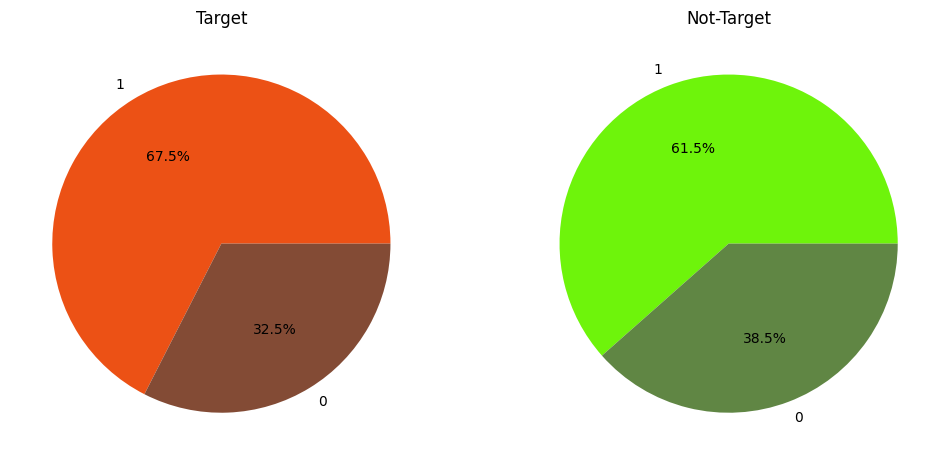

In [54]:
value_counts = time_df[time_df["target"] == 1]["work_hours"].value_counts()
value_counts_al = time_df[time_df["target"] == 0]["work_hours"].value_counts()

value_counts_df = value_counts.reset_index()
value_counts_df.columns = ['work', 'count']

value_counts_tr_df = value_counts_al.reset_index()
value_counts_tr_df.columns = ['work', 'count']

plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
plt.pie(value_counts_df['count'],labels=value_counts_df['work'], autopct='%1.1f%%', colors=['#ec5115','#834b35'])
plt.title("Target")

plt.subplot(1,2,2)
plt.pie(value_counts_tr_df['count'],labels=value_counts_df['work'], autopct='%1.1f%%', colors=['#6ef40b','#608644'])
plt.title("Not-Target")

Almost the same

In [55]:
hour_counts1 = time_df[time_df["target"] == 1]["start_hour"].value_counts()
target_hour_count = hour_counts1.max()
target_hour_id = hour_counts1.idxmax()

hour_counts2 = time_df[time_df["target"] == 0]["start_hour"].value_counts()
nontarget_hour_count = hour_counts2.max()
nontarget_hour_id = hour_counts2.idxmax()

print(f"Alice start mostly at hour:{nontarget_hour_id}\nTarget starts mostly at hour:{target_hour_id}")


Alice start mostly at hour:10
Target starts mostly at hour:16


lets try to teach a model with this hours

## Creating a model

In [57]:
x = time_df[['minutes', 'start_week', 'start_hour', 'dow', 'is_weekend', 'work_hours']]
y = time_df["target"]


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


In [59]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99
